In [1]:
%qtconsole

# Expectation Maximization (theory)
Please see slides 17-30 in `ML-Clustering-L2.pdf` for an explanation of the Expecation Maximization algorithm. Let $D = \{x_1,...,x_n\}\subseteq \mathbb{R}^d$. Recall that in the EM algorithm we represent a clustering as a probability distribution over the points. The probability that a point, $x$, belongs to some cluster $C_i$ is assumed to be Gaussian, i.e.:

$$
\Pr(x\ | \ C_i) = \frac{1}{\sqrt{(2\pi)^d|\Sigma_i|}}\cdot e^{-\frac{1}{2}\cdot (x-\mu_i)^\intercal\cdot (\Sigma_i)^{-1}\cdot (x-\mu_i)}, \ \quad i=1, \dots k \ \qquad (1).
$$

Where $|\Sigma_i |$ denotes the determinant of $\Sigma_i$.



Each cluster $C_i$ is parameterized with a cluster mean $\mu_i\in\Bbb R^d$, a covariance matrix $\Sigma_i\in\Bbb R^{d\times d}$ and a prior probability $\Pr(C_i)$.

<!--Given a clustering $M = \{C_1,\ldots,C_k\}$, we can compute
$$
\Pr(x) = \sum_{i=1}^k \Pr(C_i)\cdot\Pr(x|C_i),
$$
where we estimate $\Pr(C_i)$ by $W_i$, the frequency of the cluster $C_i$ in the data (i.e. the ratio of data points belonging to cluster $C_i$).-->

The Expectation Maximization has two steps: Expectation and Maximization (hence the name). Before these steps we need to initialize a clustering $M = \{C_1,\ldots,C_k\}$. A (very) simple heuristic for initialization is:
- Choose cluster mean $\mu_i\in\Bbb R^d$ uniformly at random (in the adequate region). 
- Initialize the covariance matrix $\Sigma_i\in\Bbb R^{d\times d}$ as the identity matrix. 
- Initialize the prior probability $\Pr(C_i)$ to $\frac{1}{k}$. 


Then we repeat the following two steps until the sum $\sum_{i=1}^k \|\mu_i - \mu'_i\|$ is below some pre-specified threshold $\epsilon$ (where $\mu'_i$ and $\mu_i$ are the means computed in two consecutive executions).

- <b>Update probabilities (expectation step):</b> For all pairs $C_i$ and $x_j$ compute $\Pr(C_i|x_j) = \frac{\Pr(x_j \ | \ C_i)\cdot \Pr(C_i)}{\Pr(x_j)}$. To do this we need to compute $\Pr(x_j \ | \ C_i)$ and $\Pr(x_j)$. Compute $\Pr(x_j \ | \ C_i)$ by the formula (1) above and compute $$\Pr(x_j)= \sum_{i=1}^k \Pr(C_i)\cdot\Pr(x_j \ | \ C_i).$$ 
  
- <b>Update clustering (maximization step): </b>Compute a new model by recomputing $W_i \approx \Pr(C_i)$, $\mu_i$ and $\Sigma_i$ as

$$
W_i = \frac{1}{n}\cdot\sum_{x\in D}\Pr(C_i \ | \ x)\approx P(C_i),
\qquad
\mu_i = \frac{\sum_{x\in D}^n x\Pr(C_i \ | \ x)}{\sum_{x\in D} \Pr(C_i \ | \ x)},
\qquad
\Sigma_i = \frac{\sum_{x\in D} \Pr(C_i \ | \ x)\cdot(x-\mu_i)\cdot(x-\mu_i)^\intercal}{\sum_{x\in D} \Pr(C_i \ | \ x)}.
$$

<b>Question 1:</b> What is the objective function of Expectation Maximization (EM) clustering problem? 

HINT: See slides pages 19. 

<!--<b>Question 1 (b): </b>Rewrite the objective for $\text{dist}(x,y)=||x-y||$-->

<b>Question 2:</b> What are the E-step, M-step? What is estimated, what is fixed?

<b>Question 3:</b> Does EM algorithm provide any guarantees for finding the optimal solution?

HINT: What is the optimal solution? 

<b>Question 4 (b): </b>Could we assign a "hard clustering" of all points instead of a probability?


<b>Question 5:</b> Can a cluster in a hard EM clustering be empty? 

<b>Question 6:</b> Is the EM algorithm guaranteed to converge? 

HINT: Assume the objective is strictly decreasing between every step of the algorithm. 

<b>Question 7 (a): </b>How is Expectation Maximization Clustering a generalizaton of k-means clustering?

HINT: See the book [ZM] page 353. 

<b>Question 7 (b): </b>Both models rely on certain assumptions on the data. What are these assumptions? Which assumptions are shared?

<b>Question 7 (c): </b>Give examples of data where the assumptions of k-means clustering and EM clustering are reasonable/unreasonable. 

HINT: Draw data that satisfies/doesn't satisfy all assumptions for k-means clustering. What about EM clustering? 

<!--
TODO: Some question that I thought about which would be nice to have is like a discussion about the differences between Kmeans and EM. The book points out (page 353) that EM is some kind of generalization of Kmeans, so in some sense it's more versatil (for example, it doesn't restrict us to convex clusters -right?- and it seems like the fact that the clusters are ''randomized'' allows us to do more things). What are the advantages/disadvantages of each? -->


# EM-clustering as a Hidden Markov Model (optional)

One can also think of the EM-clustering model as a particularly simple HMM. If we consider a model with $k$ clusters, we can define a corresponding HMM with $k$ hidden states. The transition probability from any state $j$ to any state $i$ is identical to the prior probability, $\Pr(C_i)$. The emission probability in hidden state $i$ is $\Pr(x \ | \ C_i)$, (a gaussian probability distribution). 


The data set we have, $D =\{x_1, \dots x_m \} $ corresponds to the emissions from the HMM, and the (hard) clustering is the decoding! Since the transition probabilities $\Pr(z_n = i \ | \ z_{n-1} = j) = P(C_i)$ do not depend on $j$, finding a decoding is particularly simple. In fact, the Viterbi and the Posterior decoding will give the same results (why?). The result will be, that $z_j = \text{argmax}_i \Pr(x_j \ | \ C_i)$. 


Now, the Baum-Welch training we saw for HMMs summarized in slide 20 in the slide-set hmm-training is *exactly* the algorithm presented above for EM-clustering! You may try to derive this if you have the time.

# Expectation Maximization (code)
In this exercise you must implement the EM algorithm. To test our implementation we will need data. Like last week we use the Iris dataset. Recall that the dataset has three clases so we <i>cheat</i> by setting $k=3$.

In [1]:
# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens, you may experiment with this.
k = 3
print(X.shape)

(150, 2)


## Implementing EM algorithm
Remember the Expectation Maximization algorithm has two steps. Let us first implement the Expectation step. For this step it suffices to compute $\Pr(C_i\mid x_j)$ for $i=1,\ldots,k$ and $j=1,\ldots n$. Remember that $\Pr(C_i \mid x_j)$ can be computed as 

$$\Pr(C_i|x_j) = \frac{\Pr(x_j|C_i)\cdot \Pr(C_i)}{\Pr(x_j)}$$

The first goal will then be to compute each part of the above equation. To do this we will need the parameters: ($\mu_i, \Sigma_i, \Pr(C_i)$). These will be represented in Python as follows: 

$$\text{means}=\begin{pmatrix}
- & \mu_1^T & - \\
- & \vdots & - \\
- & \mu_k^T & - 
\end{pmatrix}\in \mathbb{R}^{k\times d} \quad\quad
\text{probs_c}=\begin{pmatrix}
\Pr(C_1)\\
\vdots \\
\Pr(C_k)
\end{pmatrix}\in \mathbb{R}^{k}
$$

Similarly we represent the $\Sigma_i$'s as $\text{covs}\in\mathbb{R}^{k\times d \times d}$ such that $\text{covs[i]}=\Sigma_i$. Finally we represent $\Pr(x)$'s and $\Pr(C_i \mid x)$ as 

$$\text{prob_x}=\begin{pmatrix}
\Pr(x_1) \\
\vdots \\
\Pr(x_n) 
\end{pmatrix}\in \mathbb{R}^{n} \quad\quad
\text{probs_cx}=\begin{pmatrix}
\Pr(C_1\mid x_1) & \ldots & \Pr(C_1 \mid x_n)\\
\vdots \\
\Pr(C_k \mid x_1) & \ldots & \Pr(C_k \mid x_n)
\end{pmatrix}\in \mathbb{R}^{k\times n}
$$

The function *compute_probs_cs* below takes `means`, `probs_c` and `covs` as input and returns `probs_cx` and `probs_x`. 

<b>Question: </b>What is the dimensions of `probs_cx` and how can we compute it given `means`, `probs_c` and `covs`?

<!-- The algorithm returns a clustering $M = \{C_1,\ldots,C_k\}$. This corresponds to a 
 - sequence of means $(\mu_1,\ldots,\mu_k)$ where each $\mu_i\in\Bbb R^d$,
 - sequence of covariance matrices $(\Sigma_1,\ldots,\Sigma_k)$ where each $\Sigma_i\in\Bbb R^{d\times d}$,
 - prior probabilities $(\Pr(C_1),\ldots,\Pr(C_k))$. 

Given $x$ we can then compute the probability of $x$ conditioned on the $i$'th cluster $Pr(C\mid x_i)$. If we want to assign $x$ to a specific cluster we compute $(\Pr(x|C_1),\ldots,\Pr(x|C_k))$ and assign $x$ to the `arg max`.-->

<!--The following helper function takes a description of a Gaussian Mixture ($\mu_i$'s, $\Sigma_i$'s and $\Pr(C_i)$'s)) and returns the probability densities of each point. We represent the inputs as 

If you want more information you can take a look at scipy's [multivariate_normal](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.multivariate_normal.html) documentation.-->

In [2]:
import numpy as np
from scipy.stats import multivariate_normal

def compute_probs_cx(points, means, covs, probs_c):
    '''
    Input
      - points:    (n times d) array containing the dataset
      - means:     (k times d) array containing the k means
      - covs:      (k times d times d) array such that cov[j,:,:] is the covariance matrix of the j-th Gaussian.
      - probs_c:   (k) array containing priors
    Output
      - probs_cx:  (k times n) array such that the entry (i,j) represents Pr(C_i|x_j)
    '''
    # Convert to numpy arrays.
    points, means, covs, probs_c = np.asarray(points), np.asarray(means), np.asarray(covs), np.asarray(probs_c)
    
    # Get sizes
    n, d = points.shape
    k = means.shape[0]
    
    # Compute probabilities
    # This will be a (k, n) matrix where the (i,j)'th entry is Pr(C_i)*Pr(x_j|C_i).
    probs_cx = np.zeros((k, n))
    for i in range(k):
        
         # Handle numerical issues, these lines are unimportant for understanding the algorithm. 
        if np.allclose(np.linalg.det(covs[i]), 0):  # det(A)=0 <=> singular. 
            print("Numerical issues, run again. ") 
            return None, None
        
        probs_cx[i] = probs_c[i] * multivariate_normal.pdf(mean=means[i], cov=covs[i], x=points)
        
    
    # The sum of the j'th column of this matrix is P(x_j); why?
    probs_x = np.sum(probs_cx, axis=0, keepdims=True) 
    assert probs_x.shape == (1, n)
    
    # Divide the j'th column by P(x_j). The the (i,j)'th then 
    # becomes Pr(C_i)*Pr(x_j)|C_i)/Pr(x_j) = Pr(C_i|x_j)
    probs_cx = probs_cx / probs_x
    
    return probs_cx, probs_x

The following is the basic structure for the EM algorithm. For the Expectation step it calls the above code. You need to finish the Maximization step 

<b>Question: </b>Where in the code (and how) do we initialize `means`, `covs` and `probs_c`?

The above code computed the Expectation step. In the code below you should implement the Maximization step.

<b>Question: </b>Which three things do you need to compute in the Maximization step?

In [3]:
def em_algorithm(X, k, T, epsilon = 0.001, means=None):
    """ Clusters the data X into k clusters using the Expectation Maximization algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations
        epsilon :  Stopping criteria for the EM algorithm. Stops if the means of
                   two consequtive iterations are less than epsilon.
        means : (k times d) array containing the k initial means (optional)
        
        Returns
        -------
        means:     (k, d) array containing the k means
        covs:      (k, d, d) array such that cov[j,:,:] is the covariance matrix of 
                   the Gaussian of the j-th cluster
        probs_c:   (k, ) containing the probability Pr[C_i] for i=0,...,k. 
        llh:       The log-likelihood of the clustering (this is the objective we want to maximize)
    """
    n, d = X.shape
    
    # Initialize and validate mean
    if means is None: 
        means = np.random.rand(k, d)

    # Initialize cov, prior
    probs_x  = np.zeros(n) 
    probs_cx = np.zeros((k, n)) 
    probs_c  = np.zeros(k) + np.random.rand(k)
    
    covs = np.zeros((k, d, d))
    for i in range(k): covs[i] = np.identity(d)
    probs_c = np.ones(k) / k
    
    # Column names
    print("Iterations\tLLH")
    
    close = False
    old_means = np.zeros_like(means)
    iterations = 0
    while not(close) and iterations < T:
        old_means[:] = means 

        # Expectation step
        probs_cx, probs_x = compute_probs_cx(X, means, covs, probs_c)
        if probs_cx is None: return em_algorithm(X, k, T, epsilon = epsilon)
        assert probs_cx.shape == (k, n)
        
        # Maximization step
        # YOUR CODE HERE
        for i in range(k):
            #Re-estimate priors
            probs_c[i] = np.sum(probs_cx[i]) / n
            
            #Re-estimate mean
            mean_num = np.sum((probs_cx[i][j] * X[j] for j in range(n)), axis=0) 
            means[i] = mean_num / (np.sum(probs_cx[i]))
            
            #Re-estimate covariance matrix
            covs_num = np.sum((probs_cx[i][j] * (X[j] - means[i]) *(X[j] - means[i])[:,None] for j in range(n)),axis=0)
            covs[i] = covs_num / np.sum(probs_cx[i])
        # END CODE
        
        # Compute per-sample average log likelihood (llh) of this iteration     
        llh = 1/n*np.sum(np.log(probs_x))
        print(iterations+1, "\t\t", llh)

        # Stop condition
        dist = np.sqrt(((means - old_means) ** 2).sum(axis=1))
        close = np.all(dist < epsilon)
        iterations += 1
        
    # Validate output
    assert means.shape == (k, d)
    assert covs.shape == (k, d, d)
    assert probs_c.shape == (k,)
    return means, covs, probs_c, llh

# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3

means, covs, priors, llh = em_algorithm(X, 3, 100, 0.001)

Iterations	LLH
1 		 -18.270199882699256
2 		 -1.8004985891156868
3 		 -1.800153916924435
4 		 -1.7997324617361146
5 		 -1.7991139843756105
6 		 -1.7981405162683746
7 		 -1.796504590562936
8 		 -1.793526456120886
9 		 -1.7879243046391344
10 		 -1.7782521380855179
11 		 -1.7634646355861179
12 		 -1.741721938659232
13 		 -1.7094468271563108
14 		 -1.664236123489763
15 		 -1.620710321203803
16 		 -1.5900799676884094
17 		 -1.5591070754781255
18 		 -1.530864479637467
19 		 -1.51347225444992
20 		 -1.5071845207919343
21 		 -1.5055345694527078
22 		 -1.504425661458305
23 		 -1.503058312775261
24 		 -1.5014751922425078
25 		 -1.49980094878173
26 		 -1.498114910829629
27 		 -1.4964953684417046
28 		 -1.4950413088018217
29 		 -1.493834115954065
30 		 -1.4928971860891143
31 		 -1.4922015714613475
32 		 -1.4916978989654957
33 		 -1.4913384865412567
34 		 -1.4910840837114276
35 		 -1.4909040503836948
36 		 -1.490775277134985
37 		 -1.4906810061524438
38 		 -1.4906095891153182
39 		 -1.4905532436220

The random initialization usually causes the algorithm to get stuck at different local maxima. This causes different runs to get different scores. In practice this can for example be handled by running the algorithm several times and picking the best run. 

The following code runs EM algorithm 50 times and plots the score of each run. Because the data set is fairly small, $n=150$, most of the runs will get almost the same score. 

<IPython.core.display.Javascript object>


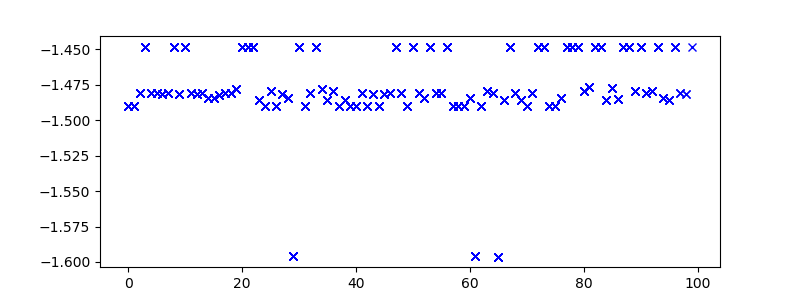

Iterations	LLH
1 		 -19.984272908589027
2 		 -1.7996247184584258
3 		 -1.7980247899180564
4 		 -1.7955311217691399
5 		 -1.7912797555350168
6 		 -1.784400239034667
7 		 -1.774830953290585
8 		 -1.7633767193867396
9 		 -1.749930843494764
10 		 -1.7325435720990399
11 		 -1.707195457904565
12 		 -1.666672871071494
13 		 -1.6098227053041612
14 		 -1.562820641742261
15 		 -1.532096002530072
16 		 -1.5166809118788578
17 		 -1.5115828358905485
18 		 -1.5094042444192342
19 		 -1.5078227078058963
20 		 -1.5065945085079842
21 		 -1.5055356480251112
22 		 -1.5044043836785717
23 		 -1.5031063019361555
24 		 -1.5016403122173663
25 		 -1.5000423119343613
26 		 -1.4984129821396464
27 		 -1.4968930168476229
28 		 -1.4955866466881143
29 		 -1.4945293925941405
30 		 -1.4937059853599268
31 		 -1.4930769719330355
32 		 -1.4925986265787732
33 		 -1.4922333367990888
34 		 -1.4919520207152785
35 		 -1.4917327973572434
36 		 -1.491559125255321
37 		 -1.491418495281252
38 		 -1.4913016029764559
39 		 -1.491201

54 		 -1.4818883024853695
55 		 -1.4818470725295847
56 		 -1.4818079536657771
57 		 -1.4817708398088465
58 		 -1.4817356263214168
59 		 -1.4817022110645546
60 		 -1.4816704951581579
61 		 -1.4816403835061427
62 		 -1.4816117851336443
63 		 -1.481584613376065
64 		 -1.4815587859531845
65 		 -1.4815342249556607
66 		 -1.481510856766244
67 		 -1.4814886119336883
68 		 -1.4814674250137325
69 		 -1.4814472343885052
70 		 -1.4814279820731926
71 		 -1.4814096135167725
72 		 -1.4813920774019358
73 		 -1.4813753254479853
74 		 -1.4813593122194206
75 		 -1.4813439949420533
76 		 -1.4813293333278634
77 		 -1.4813152894092438
78 		 -1.4813018273829384
79 		 -1.4812889134636404
80 		 -1.481276515747034
81 		 -1.4812646040819017
82 		 -1.4812531499508086
Iterations	LLH
1 		 -18.179812462256233
2 		 -1.7999830180448764
3 		 -1.7991238729694654
4 		 -1.7978628754303798
5 		 -1.7957339508043062
6 		 -1.7920709641349737
7 		 -1.785997500474397
8 		 -1.7766915476589973
9 		 -1.763343479223374
10 		 -1.74

35 		 -1.4727245296264113
36 		 -1.472216135573751
37 		 -1.471630553105956
38 		 -1.470889848845391
39 		 -1.4698952423278446
40 		 -1.4685032745988695
41 		 -1.4665100987421187
42 		 -1.4636860996933494
43 		 -1.4599691958876582
44 		 -1.45584686102032
45 		 -1.4523431633319202
46 		 -1.450096119230931
47 		 -1.4489343187275316
48 		 -1.448415545247937
49 		 -1.4482055451270106
50 		 -1.448125502629178
51 		 -1.4480959434464915
52 		 -1.44808516248842
53 		 -1.4480812332474178
Iterations	LLH
1 		 -18.116430810045948
2 		 -1.800528299506845
3 		 -1.8001738381844712
4 		 -1.7996549216639772
5 		 -1.798718374421482
6 		 -1.7967589541340492
7 		 -1.792272091951033
8 		 -1.7820336178916447
9 		 -1.759847109198698
10 		 -1.7189753046442677
11 		 -1.6745687027576754
12 		 -1.6439441782862507
13 		 -1.6254542434713166
14 		 -1.610669945024326
15 		 -1.5923942273072929
16 		 -1.567741072771755
17 		 -1.5420111182510021
18 		 -1.521321083548881
19 		 -1.5068972068941313
20 		 -1.49729220187109

20 		 -1.5859732984768573
21 		 -1.5693672410634003
22 		 -1.5473317290824422
23 		 -1.5248541668262503
24 		 -1.5076631034823011
25 		 -1.4967220439866424
26 		 -1.4908894021389738
27 		 -1.4879729618570796
28 		 -1.4864221255554724
29 		 -1.4855602677175272
30 		 -1.485080450469211
31 		 -1.484817331996975
32 		 -1.484675739812777
33 		 -1.4846008397763222
34 		 -1.484561745455526
35 		 -1.4845415249392795
Iterations	LLH
1 		 -18.241482640938912
2 		 -1.7981829539517489
3 		 -1.794968754990697
4 		 -1.790155478740316
5 		 -1.7830728647873446
6 		 -1.773386175125194
7 		 -1.7611105531448077
8 		 -1.746443363653201
9 		 -1.7292639114955801
10 		 -1.7088147626647887
11 		 -1.6852577635418629
12 		 -1.663297818332793
13 		 -1.6469487712190753
14 		 -1.6319701651706902
15 		 -1.6137437730477187
16 		 -1.5889027362504378
17 		 -1.5568037097543796
18 		 -1.5286415488367529
19 		 -1.516578866703841
20 		 -1.513582787344319
21 		 -1.5123403892006724
22 		 -1.5114165194003955
23 		 -1.51065087

1 		 -17.87127777039501
2 		 -1.7999117698642788
3 		 -1.79889831394781
4 		 -1.7973525252880607
5 		 -1.7948986009664305
6 		 -1.7911332917087976
7 		 -1.7855629909551212
8 		 -1.7774883066900302
9 		 -1.7659744173478829
10 		 -1.7501584626929625
11 		 -1.7296456134589615
12 		 -1.7057596155857653
13 		 -1.6834865436075557
14 		 -1.6632950938748132
15 		 -1.638698971405745
16 		 -1.612964037832572
17 		 -1.5921051651641691
18 		 -1.5776295277300327
19 		 -1.5682009466053646
20 		 -1.5621864655754976
21 		 -1.5582269862483074
22 		 -1.5553773520679541
23 		 -1.553062392499921
24 		 -1.5509373655235534
25 		 -1.5487658952042385
26 		 -1.546337550356439
27 		 -1.54342446953763
28 		 -1.5398152674387533
29 		 -1.5355063844855512
30 		 -1.530932174100256
31 		 -1.5267435545033925
32 		 -1.5232654826637215
33 		 -1.5204476533529665
34 		 -1.5181421160454451
35 		 -1.516233918310796
36 		 -1.5146476703678728
37 		 -1.5133320834859476
38 		 -1.512248068723534
39 		 -1.5113615610762439
40 		 -

91 		 -1.4858412970147024
92 		 -1.485816627609629
93 		 -1.485800628078982
94 		 -1.4857897730217933
95 		 -1.4857819536124606
96 		 -1.4857759175811047
97 		 -1.4857709229569283
98 		 -1.48576652909758
Iterations	LLH
1 		 -18.39386655430149
2 		 -1.7995541018043613
3 		 -1.7978297811318538
4 		 -1.7950580641431704
5 		 -1.7903549067701503
6 		 -1.7829171323212452
7 		 -1.772738049716278
8 		 -1.7606389043097406
9 		 -1.7469769064657863
10 		 -1.7302534223527366
11 		 -1.7051637033791982
12 		 -1.6667897124001438
13 		 -1.6254502344719812
14 		 -1.5895098644805448
15 		 -1.5623951974915364
16 		 -1.54771950296608
17 		 -1.5414270335658766
18 		 -1.5371381657439702
19 		 -1.5325705551338247
20 		 -1.5270739818075392
21 		 -1.5203160540870528
22 		 -1.5126193957137035
23 		 -1.5060258197456857
24 		 -1.5022254024010784
25 		 -1.5001640410567207
26 		 -1.498816454464562
27 		 -1.4977716338617275
28 		 -1.4968437796153586
29 		 -1.4959415733915657
30 		 -1.495032669610647
31 		 -1.4941283

Iterations	LLH
1 		 -19.565512788826165
2 		 -1.8006072902503654
3 		 -1.8003818581770377
4 		 -1.8000696571179702
5 		 -1.7995657439914852
6 		 -1.79870621047107
7 		 -1.7972017956469306
8 		 -1.7945556996887104
9 		 -1.7900363035786595
10 		 -1.782933885660186
11 		 -1.7731848130514247
12 		 -1.761622109694131
13 		 -1.7492914144004568
14 		 -1.73659922405182
15 		 -1.7228272932461748
16 		 -1.7058880874325515
17 		 -1.682497697756528
18 		 -1.6511074373474697
19 		 -1.618321848304784
20 		 -1.5890689459367644
21 		 -1.55723597019874
22 		 -1.5281803142337638
23 		 -1.5147047108183525
24 		 -1.511541435251957
25 		 -1.5104815028327376
26 		 -1.5096835168479368
27 		 -1.5089554539181638
28 		 -1.5082405511353758
29 		 -1.5074869196874527
30 		 -1.5066336780484444
31 		 -1.505605321421784
32 		 -1.5043266104515454
33 		 -1.5028051282779444
34 		 -1.5012402096228776
35 		 -1.4998518357484816
36 		 -1.498591054708161
37 		 -1.497267394148997
38 		 -1.495712207834131
39 		 -1.493781781856

Iterations	LLH
1 		 -19.074897578431564
2 		 -1.79889845488799
3 		 -1.79673559433122
4 		 -1.7935150088662797
5 		 -1.7886661984830776
6 		 -1.7816635996045214
7 		 -1.7719874086845562
8 		 -1.7592353877576106
9 		 -1.7431050276683817
10 		 -1.7231516978012063
11 		 -1.7000152424492407
12 		 -1.6788379614716846
13 		 -1.6647340431752664
14 		 -1.6543757946935782
15 		 -1.643640326334235
16 		 -1.6304709627230936
17 		 -1.6129767474279602
18 		 -1.5884673178626392
19 		 -1.5549564308979518
20 		 -1.518487113278877
21 		 -1.4942565074462688
22 		 -1.4848737696971834
23 		 -1.4805572390604895
24 		 -1.4775774606589647
25 		 -1.4754679331864853
26 		 -1.4739757274708014
27 		 -1.472829341653667
28 		 -1.471786731882189
29 		 -1.470640750217771
30 		 -1.4691879815010005
31 		 -1.4671966172160351
32 		 -1.4644283535697493
33 		 -1.4608179370234398
34 		 -1.4568170660920514
35 		 -1.4533390070648602
36 		 -1.4509411162667742
37 		 -1.4495274998820171
38 		 -1.4487748311391262
39 		 -1.448401

20 		 -1.5241966392930013
21 		 -1.5214730249834258
22 		 -1.519208033845645
23 		 -1.5173087322595775
24 		 -1.5157013333394314
25 		 -1.5143269675942035
26 		 -1.513136662075661
27 		 -1.512087764956743
28 		 -1.5111415462664077
29 		 -1.510261394750539
30 		 -1.509409507324502
31 		 -1.5085363573632666
32 		 -1.5075621825984846
33 		 -1.5063956974521482
34 		 -1.5050650109095316
35 		 -1.5037373744843006
36 		 -1.5024534551019544
37 		 -1.5011756796545968
38 		 -1.4998958547722465
39 		 -1.4986451046602733
40 		 -1.4974823341916248
41 		 -1.4964549481630187
42 		 -1.4955755330527736
43 		 -1.494828384258074
44 		 -1.4941887048259117
45 		 -1.4936355961186254
46 		 -1.4931539979425346
47 		 -1.4927305752323965
48 		 -1.49234908111272
49 		 -1.4919873506006667
50 		 -1.4916155812345384
51 		 -1.4911952936785464
52 		 -1.4906802463234838
53 		 -1.4900247443250711
54 		 -1.4892099812217947
55 		 -1.4882931798036854
56 		 -1.4874368446797357
57 		 -1.486819466204807
58 		 -1.486476727913

16 		 -1.539948450746812
17 		 -1.52021777197894
18 		 -1.5122314201246374
19 		 -1.510107536529046
20 		 -1.5093106179674303
21 		 -1.5087349375189578
22 		 -1.5082036954671731
23 		 -1.5076591869679739
24 		 -1.5070493542531564
25 		 -1.5063114404501017
26 		 -1.5053686325324012
27 		 -1.504150965926432
28 		 -1.50268483929555
29 		 -1.5011677959404983
30 		 -1.4997600592483942
31 		 -1.498410456301053
32 		 -1.4969823539210931
33 		 -1.4953190993338419
34 		 -1.4932394119317953
35 		 -1.4906655913393616
36 		 -1.4878262168656589
37 		 -1.484559037441457
38 		 -1.4796521840875216
39 		 -1.4728837886522306
40 		 -1.4677551829522304
41 		 -1.4643556717781119
42 		 -1.4621688315043226
43 		 -1.4608325495033216
44 		 -1.4601416086233818
45 		 -1.459780748756279
46 		 -1.45955279498139
47 		 -1.4593729449575417
48 		 -1.4591981196756638
49 		 -1.4589890335424507
50 		 -1.4586750796203776
51 		 -1.458054172402935
52 		 -1.4562856504537818
53 		 -1.4482211700397067
54 		 -1.3998247526468994

1 		 -17.477880095165045
2 		 -1.8005872747218052
3 		 -1.8004367304524205
4 		 -1.8002909285004425
5 		 -1.8001085273799213
6 		 -1.7998550375084397
7 		 -1.799466497975159
8 		 -1.7987965629552307
9 		 -1.7974782150669717
10 		 -1.7945450773699205
11 		 -1.7876396579084437
12 		 -1.7726238263408347
13 		 -1.7435190957364608
14 		 -1.6971364787493648
15 		 -1.6479145530663921
16 		 -1.6096970322814792
17 		 -1.5842966561434884
18 		 -1.5676236345917525
19 		 -1.5566557797341887
20 		 -1.5489255588671655
21 		 -1.5422108343196805
22 		 -1.5343455829836525
23 		 -1.523876077854674
24 		 -1.5120756464088512
25 		 -1.502186959594481
26 		 -1.495418884480362
27 		 -1.491066367108409
28 		 -1.488319281220637
29 		 -1.48662355518807
30 		 -1.48558041261199
31 		 -1.4849113042454254
32 		 -1.484444741105701
33 		 -1.4840856244836416
34 		 -1.4837833972751222
35 		 -1.483511385239913
36 		 -1.4832561438491054
37 		 -1.483012263509491
38 		 -1.4827794475285303
39 		 -1.4825603264297265
40 		 -1

34 		 -1.482490809818917
35 		 -1.4760096660238418
36 		 -1.4696059025895034
37 		 -1.4654893335117498
38 		 -1.4628813470064572
39 		 -1.4612377286485427
40 		 -1.4603422740438505
41 		 -1.4598904864714461
42 		 -1.4596274492673578
43 		 -1.459436079933618
44 		 -1.4592635492061121
45 		 -1.4590724675327966
46 		 -1.4588094219641552
47 		 -1.4583425776500474
48 		 -1.457194136670729
49 		 -1.4528039449276082
50 		 -1.428106291121407
Numerical issues, run again. 
Iterations	LLH
1 		 -18.399253107798202
2 		 -1.800240661998809
3 		 -1.7994660003177199
4 		 -1.7982425046470978
5 		 -1.796069067344853
6 		 -1.792168836387707
7 		 -1.7856443844145733
8 		 -1.776011971285268
9 		 -1.7626650605164795
10 		 -1.7435114337683468
11 		 -1.7148454149144552
12 		 -1.6716663501349458
13 		 -1.6178715653419573
14 		 -1.5770999223329345
15 		 -1.5463252262598475
16 		 -1.5264561054637946
17 		 -1.5181194857475049
18 		 -1.5142071697319877
19 		 -1.5109330607523321
20 		 -1.5072160065126465
21 		 -1.5

Iterations	LLH
1 		 -20.88234857599533
2 		 -1.7936358376954924
3 		 -1.7854714066559763
4 		 -1.7748808532190046
5 		 -1.7622285120530188
6 		 -1.7484417749227295
7 		 -1.7339536400889954
8 		 -1.7179071318040922
9 		 -1.697813838123613
10 		 -1.6703821602812885
11 		 -1.6368879310031748
12 		 -1.6061920309308226
13 		 -1.576923864065882
14 		 -1.5445758292547267
15 		 -1.522187178266917
16 		 -1.5152341705100023
17 		 -1.513084620129572
18 		 -1.5114156156491365
19 		 -1.5095970753383283
20 		 -1.5074883331978128
21 		 -1.5053093161638444
22 		 -1.503439684544594
23 		 -1.5017940754180252
24 		 -1.5001839401402146
25 		 -1.498634259460989
26 		 -1.4972324178605356
27 		 -1.4960349558987602
28 		 -1.495060278339103
29 		 -1.4942914925065223
30 		 -1.493691520197165
31 		 -1.4932218465947629
32 		 -1.4928520292175644
33 		 -1.4925600869348936
34 		 -1.4923295679493145
35 		 -1.4921471259972332
36 		 -1.492001442040696
37 		 -1.491882977692916
38 		 -1.491783962512204
39 		 -1.491698322

11 		 -1.6896816129711258
12 		 -1.6590698111398174
13 		 -1.6275840336017757
14 		 -1.59816820151128
15 		 -1.565064712212076
16 		 -1.5344776677588228
17 		 -1.5197912260508657
18 		 -1.5157357526352413
19 		 -1.5140877725862836
20 		 -1.512884629455742
21 		 -1.5118850684374998
22 		 -1.5110208456727572
23 		 -1.5102448078542534
24 		 -1.509516834272058
25 		 -1.5088021008248906
26 		 -1.508074504636653
27 		 -1.5073265082527125
28 		 -1.5065826017444344
29 		 -1.5059017195448372
30 		 -1.5053502513576136
31 		 -1.504958822799591
32 		 -1.5047080710321703
33 		 -1.504553136426634
34 		 -1.504451761449022
35 		 -1.5043751440216444
36 		 -1.5043066293824285
37 		 -1.5042373193029783
38 		 -1.5041625198633435
39 		 -1.504079490052412
40 		 -1.5039860154680404
41 		 -1.5038794226707468
42 		 -1.5037559122626754
43 		 -1.503610267921171
44 		 -1.5034360813758885
45 		 -1.5032266408607409
46 		 -1.502976495048018
47 		 -1.502683273398781
48 		 -1.5023486780221804
49 		 -1.5019773684941236

15 		 -1.6710810410281072
16 		 -1.662629966385109
17 		 -1.6538688962516588
18 		 -1.644191740392888
19 		 -1.6327771714145627
20 		 -1.6185751829728117
21 		 -1.600045547807761
22 		 -1.574812528200256
23 		 -1.5418402766364718
24 		 -1.5114526029794817
25 		 -1.4984951127340733
26 		 -1.4956538694028136
27 		 -1.4946059577432664
28 		 -1.4938645578166008
29 		 -1.4932934529664192
30 		 -1.4928526397608546
31 		 -1.4925170197575404
32 		 -1.492267281151938
33 		 -1.4920863129202884
34 		 -1.4919583955636815
35 		 -1.4918696166860048
36 		 -1.4918083648760683
37 		 -1.4917654551619264
38 		 -1.4917338841245373
39 		 -1.4917083671624234
40 		 -1.4916848009410009
41 		 -1.4916597304644381
42 		 -1.4916298380295405
43 		 -1.4915914259711198
44 		 -1.4915398333141834
45 		 -1.4914687012107857
46 		 -1.491368982796641
47 		 -1.4912276005060994
48 		 -1.4910257672693055
49 		 -1.4907374382627192
50 		 -1.490329699294448
51 		 -1.4897699943723721
52 		 -1.4890492455596833
53 		 -1.4882244675

19 		 -1.5034242148559898
20 		 -1.5020806375815516
21 		 -1.5005679243476369
22 		 -1.498965231953118
23 		 -1.4974152734231472
24 		 -1.4960519890050419
25 		 -1.4949330790853093
26 		 -1.49404848417737
27 		 -1.4933595283469392
28 		 -1.492824806704847
29 		 -1.49240976112023
30 		 -1.4920874956912644
31 		 -1.4918368140951528
32 		 -1.4916405114658065
33 		 -1.4914845762849425
34 		 -1.4913579026626753
35 		 -1.4912520619624636
36 		 -1.491160953264827
37 		 -1.491080354089249
38 		 -1.4910074560529758
39 		 -1.4909404533330832
40 		 -1.4908782149418471
41 		 -1.4908200432545406
42 		 -1.4907655064107426
43 		 -1.4907143276102561
44 		 -1.4906663152157078
45 		 -1.4906213206077523
46 		 -1.4905792141033873
47 		 -1.4905398721651475
48 		 -1.4905031713796972
49 		 -1.4904689863012903
50 		 -1.4904371893599793
51 		 -1.4904076517593061
52 		 -1.4903802447477668
53 		 -1.490354840930523
54 		 -1.4903313154555142
55 		 -1.4903095470042458
56 		 -1.4902894185701607
57 		 -1.490270818034

Iterations	LLH
1 		 -19.260701081620624
2 		 -1.800438057525662
3 		 -1.7999554936610598
4 		 -1.7992077123654084
5 		 -1.7979436754137998
6 		 -1.7958207083855595
7 		 -1.792370224669383
8 		 -1.7869614708219574
9 		 -1.7786157055077663
10 		 -1.7654367993885518
11 		 -1.743850303589298
12 		 -1.7079515177147908
13 		 -1.6532319946105836
14 		 -1.601075146159281
15 		 -1.572048561398655
16 		 -1.5588886313735602
17 		 -1.550004292237004
18 		 -1.5407932745114643
19 		 -1.5308710366950593
20 		 -1.5212187446708871
21 		 -1.512590845986563
22 		 -1.505328801024075
23 		 -1.4995707702432535
24 		 -1.495230702043992
25 		 -1.4919730153879196
26 		 -1.489354630939105
27 		 -1.486998361106685
28 		 -1.4846892433838852
29 		 -1.4824299411969526
30 		 -1.4804030652129319
31 		 -1.4787782623296066
32 		 -1.4775661432019869
33 		 -1.47666841373931
34 		 -1.4759760763303256
35 		 -1.4754088304285407
36 		 -1.4749147209188185
37 		 -1.4744601111254965
38 		 -1.4740208517578601
39 		 -1.4735761340

92 		 -1.4815708101999805
93 		 -1.4811233045292451
94 		 -1.4805583400713402
95 		 -1.479870957091066
96 		 -1.4790844848221951
97 		 -1.47825578967782
98 		 -1.4774657455720748
99 		 -1.4767935039695783
100 		 -1.4762854109946555
Iterations	LLH
1 		 -20.24507603651162
2 		 -1.7993485035724304
3 		 -1.7973685482948107
4 		 -1.7942062781603652
5 		 -1.7889078704321955
6 		 -1.7807776223099567
7 		 -1.7702048726886321
8 		 -1.7583909804039644
9 		 -1.74588691123744
10 		 -1.7317331293914449
11 		 -1.7129606417734584
12 		 -1.683753195731638
13 		 -1.635154695631943
14 		 -1.5728939355188611
15 		 -1.5364265665640817
16 		 -1.5253083982572544
17 		 -1.5212734601709974
18 		 -1.5187034276642117
19 		 -1.516689257025593
20 		 -1.5150320662048156
21 		 -1.5136510348363952
22 		 -1.5124972934667047
23 		 -1.5115346368445184
24 		 -1.5107329046938656
25 		 -1.5100649778239663
26 		 -1.509505345261841
27 		 -1.5090294571011227
28 		 -1.5086132759929651
29 		 -1.5082325377045425
30 		 -1.507861

26 		 -1.5061935468496044
27 		 -1.5055780910263508
28 		 -1.5051135360677494
29 		 -1.504762381945218
30 		 -1.5044759946703188
31 		 -1.5042106811351978
32 		 -1.5039263289091018
33 		 -1.503579556785657
34 		 -1.5031208281378121
35 		 -1.5025066977461143
36 		 -1.501741177986468
37 		 -1.500925131291982
38 		 -1.5002176723309135
39 		 -1.4997037589647244
40 		 -1.4993572868949583
41 		 -1.4991167321018926
42 		 -1.4989359031413556
43 		 -1.4987890368463628
44 		 -1.4986630373581904
45 		 -1.4985510832774973
46 		 -1.498449123122301
47 		 -1.4983541831804421
48 		 -1.4982635764291525
49 		 -1.4981745195619116
50 		 -1.498083927976902
51 		 -1.4979882913209417
52 		 -1.497883595822995
53 		 -1.4977652922976223
54 		 -1.4976283291093815
55 		 -1.4974672850783004
56 		 -1.4972766492266882
57 		 -1.4970512986808586
58 		 -1.4967872147211854
59 		 -1.4964824361889844
60 		 -1.496138159266645
61 		 -1.4957597356364758
62 		 -1.4953571220113626
63 		 -1.4949442328760099
64 		 -1.49453689875

4 		 -1.7914214925168017
5 		 -1.7843533044936108
6 		 -1.7744938690004703
7 		 -1.7627727701949312
8 		 -1.7500248076152696
9 		 -1.735684015252091
10 		 -1.717090857810525
11 		 -1.6884189533863307
12 		 -1.6408321852618843
13 		 -1.5846539046202215
14 		 -1.548339855777052
15 		 -1.5327676613450636
16 		 -1.5266999851889977
17 		 -1.523169569253543
18 		 -1.5204854059144208
19 		 -1.5182858333794775
20 		 -1.516444970675098
21 		 -1.5148923908998413
22 		 -1.5135785767427743
23 		 -1.51246576585042
24 		 -1.511524307813
25 		 -1.5107302931828406
26 		 -1.5100634595867968
27 		 -1.5095053576563902
28 		 -1.5090380342185832
29 		 -1.5086433438784397
30 		 -1.508302681117906
31 		 -1.5079967015581417
32 		 -1.5077045634719093
33 		 -1.5074023150862284
34 		 -1.507060330921796
35 		 -1.5066406492842848
36 		 -1.5060979084091406
37 		 -1.505392183042873
38 		 -1.504514806386007
39 		 -1.5034912245959156
40 		 -1.5023444453006807
41 		 -1.5010927211086578
42 		 -1.4997636383557196
43 		 -

43 		 -1.4591479746793723
44 		 -1.458920511288423
45 		 -1.4585553098728998
46 		 -1.457768211576029
47 		 -1.4552470534337822
48 		 -1.4424018116720638
49 		 -1.3579312851406649
Numerical issues, run again. 
Iterations	LLH
1 		 -21.21542419003938
2 		 -1.7997310938865367
3 		 -1.7983930413465996
4 		 -1.7962729841708367
5 		 -1.792800154824779
6 		 -1.787315642384154
7 		 -1.779081592223985
8 		 -1.767274364823831
9 		 -1.7507917785344311
10 		 -1.7280293101717443
11 		 -1.6992383392424737
12 		 -1.6716718656332912
13 		 -1.6499224134487163
14 		 -1.6278439543454115
15 		 -1.5992673068025154
16 		 -1.5631369440547758
17 		 -1.5277969792895165
18 		 -1.5048161263261555
19 		 -1.4935929686083522
20 		 -1.4885877919720165
21 		 -1.485525353403533
22 		 -1.4832072817650332
23 		 -1.4814110953152246
24 		 -1.4800074868359834
25 		 -1.4788878879931697
26 		 -1.4779709062929614
27 		 -1.4771997110356772
28 		 -1.4765348403937826
29 		 -1.4759478399307895
30 		 -1.47541686694386
31 		 -1.474

1 		 -18.916571274475604
2 		 -1.795237683255063
3 		 -1.7881079154617663
4 		 -1.7780426365859558
5 		 -1.76560271557027
6 		 -1.7519234754459505
7 		 -1.736342202892172
8 		 -1.7157442952004052
9 		 -1.6841809832897647
10 		 -1.6325765848422025
11 		 -1.5642767073398505
12 		 -1.523425750578188
13 		 -1.5129556299992926
14 		 -1.5107712528882853
15 		 -1.5099842940349717
16 		 -1.509445334286936
17 		 -1.509000185499308
18 		 -1.5086207501202815
19 		 -1.5082961322642576
20 		 -1.5080184761841589
21 		 -1.5077796831801116
22 		 -1.5075699848909598
23 		 -1.5073771467261228
24 		 -1.5071857071792922
25 		 -1.5069754690590864
26 		 -1.5067180360129253
27 		 -1.5063694228292135
28 		 -1.5058572579471499
29 		 -1.5050733955403175
30 		 -1.5039148332049226
31 		 -1.5023579016942707
32 		 -1.500450792867261
33 		 -1.4983246545475744
34 		 -1.496034606805389
35 		 -1.4934127920320457
36 		 -1.4903675928849893
37 		 -1.4866623257805267
38 		 -1.4811896938356868
39 		 -1.4732734358891715
40 	

In [4]:
%matplotlib notebook 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(8,3))    
llhs = []

for i in range(100):
    _, _, _, llh = em_algorithm(X, 3, 100)
    llhs.append(llh)
    ax.plot(llhs, 'bx')
    fig.canvas.draw() 

To check your implementation you should run <a href="http://scikit-learn.org/stable/modules/mixture.html">sklearn</a>'s implementation of the EM algorithm. You might want to take a look at the documentation to get a better understanding of what the algorithm is actually doing.

<!--By default the implementation repeats the algorithm $10$ times and picks the best result. A sanity check for your implementation of Lloyd's algorithm is to check that the scores are roughly the same. -->

In [5]:
from sklearn.mixture import GaussianMixture as EM
expectation_maximization = EM(n_components=3, init_params='random', covariance_type='diag', verbose=2, verbose_interval =1).fit(X)

print(expectation_maximization.score(X))

Initialization 0
  Iteration 0	 time lapse 0.01601s	 ll change inf
  Iteration 1	 time lapse 0.00143s	 ll change 0.00069
Initialization converged: True	 time lapse 0.01754s	 ll -1.80613
-1.8052188721698166


To get a visual understanding of the algorithm, the following code visualizes each step of the algorithm. Similarly to previous week, it prints the centroids and the corresponding cluster each point is assigned to. Furthermore, because the clusters are represented as gaussians, the gaussians are plotted. They are first plotted by themselves, and then they are plotted together (by summing). 

To run the visualization you need to copy and paste your implementation from above. Then the code should run with no modifications. Running the visualization might be a bit slow; try change the `detail` parameter if you have any problems. 

<IPython.core.display.Javascript object>


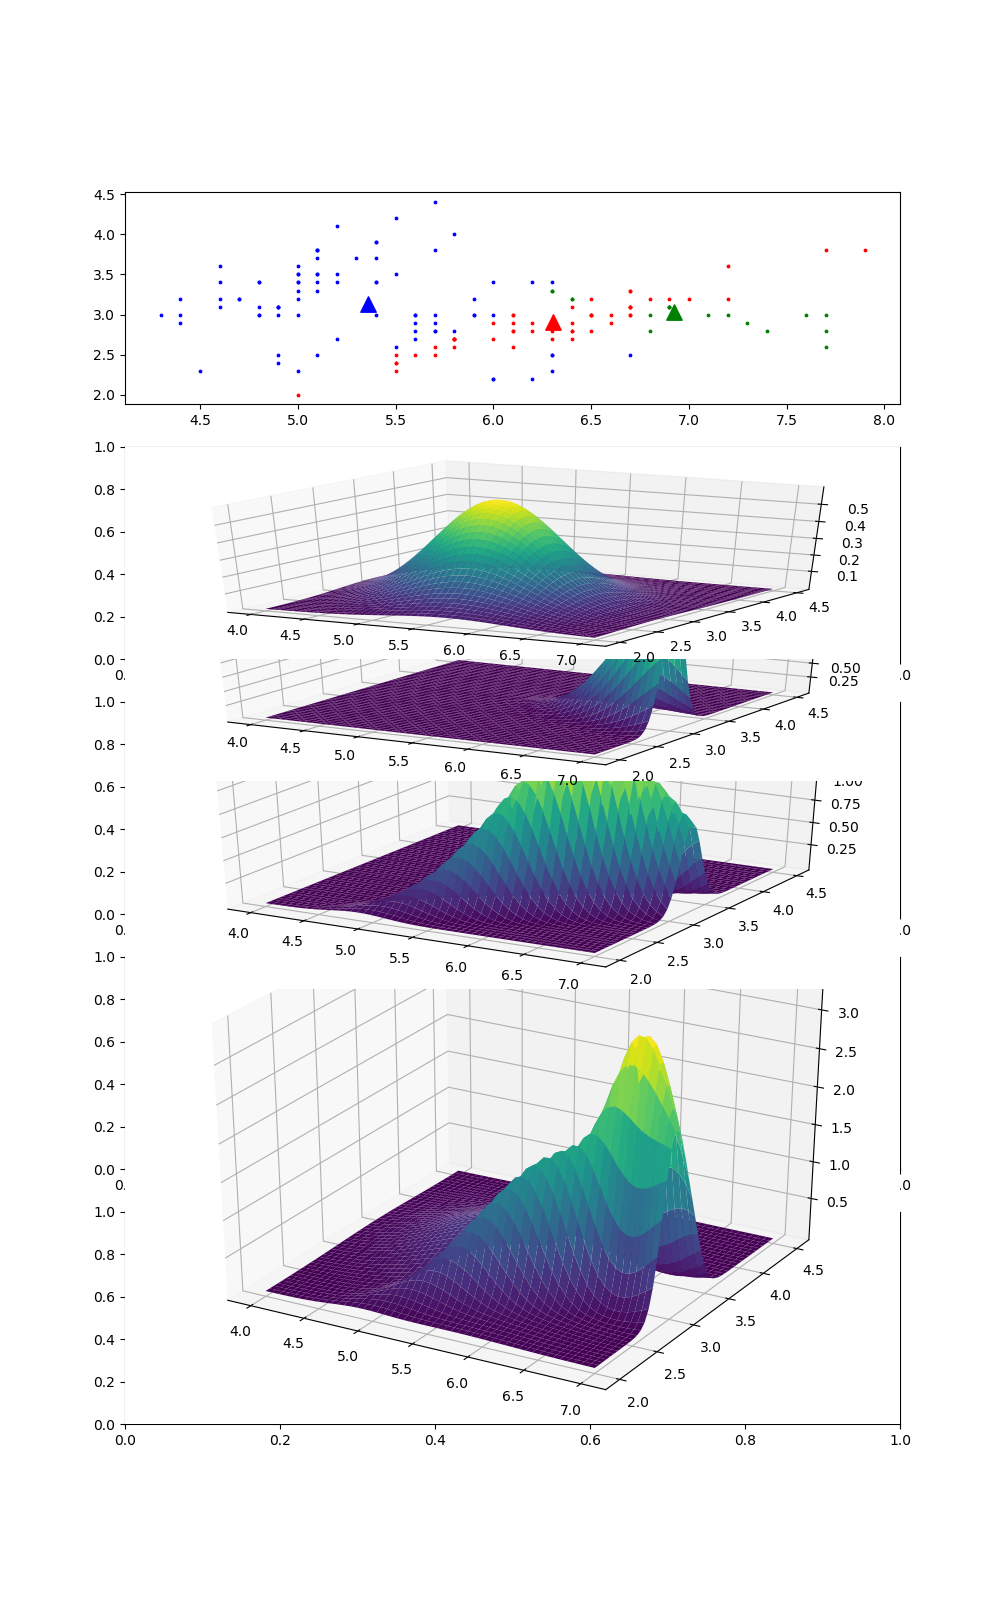

Iterations	LLH


In [6]:
%matplotlib notebook 
import matplotlib.pyplot as plt
import numpy as np
import time
from mpl_toolkits.mplot3d import Axes3D

def em_algorithm_visualize(X, k, T, epsilon = 0.001, means=None, detail=20):
    """ Clusters the data X into k clusters using the Expectation Maximization algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations
        epsilon :  Stopping criteria for the EM algorithm. Stops if the means of
                   two consequtive iterations are less than epsilon.
        means : (k times d) array containing the k initial means (optional)
        
        Returns
        -------
        means:     (k, d) array containing the k means
        covs:      (k, d, d) array such that cov[j,:,:] is the covariance matrix of 
                   the Gaussian of the j-th cluster
        probs_c:   (k, ) containing the probability Pr[C_i] for i=0,...,k. 
        llh:       The log-likelihood of the clustering (this is the objective we want to maximize)
    """
    n, d = X.shape
    
    # Visualization stuff. 
    fig, (ax, _, _, _, _) = plt.subplots(5, 1, figsize=(10,16)) 
    ax.axis('off')
    colors = ["r", "g", "b"]
    ax3d = fig.add_subplot(2, 1, 2, projection='3d')
    ax3d1 = fig.add_subplot(3, 1, 2, projection='3d')
    ax3d2 = fig.add_subplot(4, 1, 2, projection='3d')
    ax3d3 = fig.add_subplot(5, 1, 2, projection='3d')
    ax3d.set_axis_off()
    ax3d1.set_axis_off()
    ax3d2.set_axis_off()
    ax3d3.set_axis_off()
    
    # Initialize and validate mean
    if means is None: means = np.random.rand(k, d)

    # Initialize 
    probs_x  = np.zeros(n) 
    probs_cx = np.zeros((k, n)) 
    probs_c  = np.zeros(k) 
    covs = np.zeros((k, d, d))
    for i in range(k): covs[i] = np.identity(d)
    probs_c = np.ones(k) / k

    # END CODE
    
    # Column names
    print("Iterations\tLLH")
    
    close = False
    old_means = np.zeros_like(means)
    iterations = 0
    while not(close) and iterations < T:
        old_means[:] = means # This allows us to actually copy the array mean

        # Expectation step
        probs_cx, probs_x = compute_probs_cx(X, means, covs, probs_c)
        if probs_cx is None: return em_algorithm(X, k, T, epsilon = epsilon)
        assert probs_cx.shape == (k, n)
        
        # Maximization step
        # YOUR CODE HERE
        for i in range(k):
            #Re-estimate priors
            probs_c[i] = np.sum(probs_cx[i]) / n
            
            #Re-estimate mean
            mean_num = np.sum((probs_cx[i][j] * X[j] for j in range(n)), axis=0) 
            means[i] = mean_num / (np.sum(probs_cx[i]))
            
            #Re-estimate covariance matrix
            covs_num = np.sum((probs_cx[i][j] * (X[j] - means[i]) *(X[j] - means[i])[:,None] for j in range(n)),axis=0)
            covs[i] = covs_num / np.sum(probs_cx[i])
        # END CODE
        
        # Finish condition
        dist = np.sqrt(((means - old_means) ** 2).sum(axis=1))
        close = np.all(dist < epsilon)
        iterations += 1
        
        
        # !----------- VISUALIZATION CODE -----------!
        centroids = means
        # probs_cx's (i,j) is Pr[C_i, x_j]
        # assign each x_i to the cluster C_i that maximizes P(C_i | x_j)
        clustering = np.argmax(probs_cx, axis=0)
        assert clustering.shape == (n,), clustering.shape
        
        # Draw clusters
        ax.cla()
        for j in range(k):
            centroid = centroids[j]
            c = colors[j]
            ax.scatter(centroid[0], centroid[1], s=123, c=c, marker='^')
            data = X[clustering==j]
            x = data[:,0]
            y = data[:,1]
            ax.scatter(x, y, s=3, c=c)
            
        # draw 3d gaussians. 
        #Create grid and multivariate normal
        xs = np.linspace(4,7, 50)
        ys = np.linspace(2,4.5, 50)
        Xs, Ys = np.meshgrid(xs, ys)
        pos = np.empty(Xs.shape + (2,))
        pos[:, :, 0] = Xs; pos[:, :, 1] = Ys
        prob_space = sum([multivariate_normal(means[j], covs[j]).pdf(pos) for j in range(k)])

        #Make a 3D plot
        ax3d.cla()
        ax3d1.cla()
        ax3d2.cla()
        ax3d3.cla()
        ax3d.plot_surface(Xs, Ys, prob_space, cmap='viridis', linewidth=0)
        ax3d1.plot_surface(Xs, Ys, multivariate_normal(means[0], covs[0]).pdf(pos), cmap='viridis', linewidth=0)
        ax3d2.plot_surface(Xs, Ys, multivariate_normal(means[1], covs[1]).pdf(pos), cmap='viridis', linewidth=0)
        ax3d3.plot_surface(Xs, Ys, multivariate_normal(means[2], covs[2]).pdf(pos), cmap='viridis', linewidth=0)
        
        fig.canvas.draw()
        
    # Validate output
    assert means.shape == (k, d)
    assert covs.shape == (k, d, d)
    assert probs_c.shape == (k,)
    return means, covs, probs_c, llhs

# Load the Iris data set
import sklearn.datasets
iris = sklearn.datasets.load_iris()
X = iris['data'][:,0:2] # reduce dimensions so we can plot what happens.
k = 3

# the higher the detail the slower plotting
detail = 20 # 50 looks very nice but your computer might not be able to handle it. 
means, covs, priors, llh = em_algorithm_visualize(X, 3, 40, 0.001, detail=detail)

## Initializing EM with Lloyd's algorithm 

So far we have been initializing the means for the Expectation Maximization algorithm at random. We could also make a mix of Lloyd's algorithm and EM algorithm by running Lloyd's algorithm first to obtain the initial means for the EM algorithm. 

Begin by copying and pasting the implementation of Lloyd's algorithm from the previous week

In [1]:
def lloyds_algorithm(X, k, T):
    """ Clusters the data of X into k clusters using T iterations of Lloyd's algorithm. 
    
        Parameters
        ----------
        X : Data matrix of shape (n, d)
        k : Number of clusters.
        T : Maximum number of iterations to run Lloyd's algorithm. 
        
        Returns
        -------
        clustering: A vector of shape (n, ) where the i'th entry holds the cluster of X[i].
        centroids:  The centroids/average points of each cluster. 
        cost:       The cost of the clustering 
    
    """
    n, d = X.shape
    
    # Initialize clusters random. 
    clustering = np.random.randint(0, k, (n, )) 
    centroids  = np.zeros((k, d))
    
    # Used to stop if cost isn't improving (decreasing)
    cost = 0
    oldcost = 0
    
    # Column names
    print("Iterations\tCost")
    
    for i in range(T):
       # YOUR CODE HERE
        for j in range(k):
            centroids[j] = X[clustering == j].mean(axis=0)
        # END CODE

        # Update clustering 
        
        # YOUR CODE HERE
        for j in range(n):
            shortest_dist = 0
            shortest_centroid = -1
            for i in range(k):
                dist = (X[j] - centroids[i])**2
                distance = math.sqrt(np.sum(dist))
                if shortest_centroid == -1 or distance < shortest_dist :
                    shortest_centroid = i
                    shortest_dist = distance
            
            clustering[j] = shortest_centroid
            
        # END CODE
        
        # Compute and print cost
        cost = 0
        for j in range(n):
            cost += np.linalg.norm(X[j] - centroids[clustering[j]])**2 
            #   
        print(i+1, "\t\t", cost)
        
        # Stop if cost didn't improve more than epislon (decrease)
        if np.isclose(cost, oldcost): break #TODO
        oldcost = cost
        
    return clustering, centroids, cost

    pass

Then use this algorithm to initialize the means for the EM algorithm. For this notice that `em_algorithm` accepts an optional input for the initial means.

Also, notice that the sklearn's implementation of the EM algorithm can take this initialization into account. Can you look through the documentation and find out what lines should be changed when we used sklearn before? This would be very useful for testing and comparing your implementation above.

In [ ]:
# YOUR CODE HERE
# END CODE

<b>Question:</b> Why can we use Lloyd's algorithm to initialize the EM algorithm? Does it (always) give a better final clustering? If so, why is that the case?

# Clustering digits
Last week, we performed clustering of digits by the use of Lloyds algorithm. Now, we try the same with the EM clustering algorithm. The following code imports the data set:


In [ ]:
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

X = mnist_trainset.train_data.numpy().reshape((60000, 28*28))
y = mnist_trainset.train_labels.numpy()

print(X.shape)

The following code runs the Expectation Maimization algorithm on 5000 images from the MNIST dataset. It then visualizes the found centroids. 

In [ ]:
from sklearn.mixture import GaussianMixture as EM
import matplotlib.pyplot as plt

# One cluster for each digit
k = 10

# Run EM algorithm on 1000 images from the MNIST dataset. 

expectation_maximization = EM(n_components=k, max_iter=10, init_params='kmeans', covariance_type='diag', verbose=1, verbose_interval =1).fit(X)
print(expectation_maximization.score(X[:1000]))

means = expectation_maximization.means_
covs = expectation_maximization.covariances_
      
print(means.shape)
fig, ax = plt.subplots(1, k, figsize=(8, 1))

for i in range(k):
    ax[i].imshow(means[i].reshape(28, 28), cmap='gray')
    
plt.show()

<b>Question 1: </b>Why do the centroids look like images of digits? 
    
A particularly cool thing about representing a clustering as probability distributions is that it is possible to sample points from them! This way you can generate *new* images of digits. A similar idea lies behind some of the new cool techniques for generation of images such as variational autoencoders. Lets try sampling!

We have implemented a function to do this for you:

In [ ]:
from scipy.stats import multivariate_normal
import numpy as np

def sample(means, covs, num):
    mean = means[num]
    cov = covs[num]
     
    fig, ax = plt.subplots(1, 10, figsize=(8, 1))
    
    for i in range(10):
        img = multivariate_normal.rvs(mean=mean, cov=cov) # draw random sample   
        ax[i].imshow(img.reshape(28, 28), cmap='gray') # draw the random sample
    plt.show()

sample(means, covs, 5)  ##Try changing the number